In [1]:
# https://github.com/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Stock%20Market%20Analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division
import quandl as qd
import pandas_datareader as pdr
import datetime 
import csv
sns.set_style('white')
%matplotlib inline

In [2]:
# Allow us to read stock data from google etc
from pandas_datareader import DataReader

In [5]:
tech_list  = ['AAPL','GOOGL', 'MSFT','AMZN']

In [6]:
tech_list

['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [7]:
for stock in tech_list:
    print(stock)

AAPL
GOOGL
MSFT
AMZN


In [8]:
myDict = {}

for stock in tech_list:myDict[stock] = pdr.get_data_quandl(stock,start=datetime.datetime(2012,10,1),
                                                           end=datetime.datetime(2018,1,1))

In [9]:
import quandl as qd
import pandas_datareader as pdr
import datetime

GOOGL = pdr.get_data_quandl('GOOGL',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))
AAPL = pdr.get_data_quandl('AAPL',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))

MSFT = pdr.get_data_quandl('MSFT',start=datetime.datetime(2012, 10, 1), 

                          end=datetime.datetime(2018, 1, 1))
AMZN = pdr.get_data_quandl('AMZN',start=datetime.datetime(2012, 10, 1), 

                         end=datetime.datetime(2018, 1, 1))

In [10]:
GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2017-12-29 to 2012-10-01
Data columns (total 12 columns):
Open          1320 non-null float64
High          1320 non-null float64
Low           1320 non-null float64
Close         1320 non-null float64
Volume        1320 non-null float64
ExDividend    1320 non-null float64
SplitRatio    1320 non-null float64
AdjOpen       1320 non-null float64
AdjHigh       1320 non-null float64
AdjLow        1320 non-null float64
AdjClose      1320 non-null float64
AdjVolume     1320 non-null float64
dtypes: float64(12)
memory usage: 134.1 KB


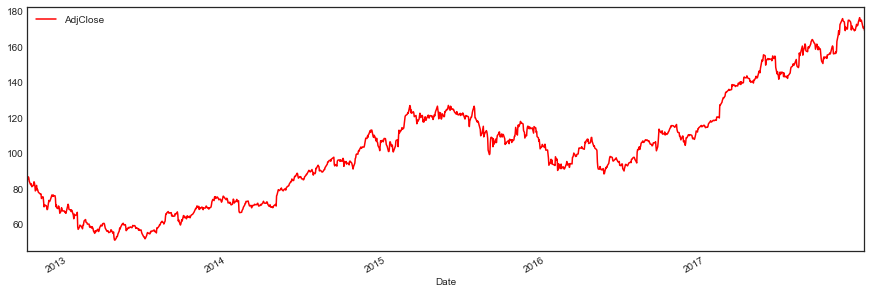

In [12]:
AAPL['AdjClose'].plot(legend=True,color = 'red', figsize=(15,5))

In [13]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA for {0} days".format(ma) 
    AAPL[column_name] = AAPL.rolling(window=ma).AdjClose.mean()

In [14]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA For %s days" %(str(ma))
    AAPL[column_name] = AAPL.rolling(window=ma).AdjClose.mean()

In [11]:
#GOOGL['MA_10'] = GOOGL.rolling(window=10).AdjClose.mean()
#GOOGL['MA_20'] = GOOGL.rolling(window=20).AdjClose.mean()
#GOOGL['MA_50'] = GOOGL.rolling(window=50).AdjClose.mean()

In [15]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,MA for 10 days,MA for 20 days,MA for 50 days,MA For 10 days,MA For 20 days,MA For 50 days
Date,,,,,,,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0,NaN,NaN,NaN,NaN,NaN,NaN


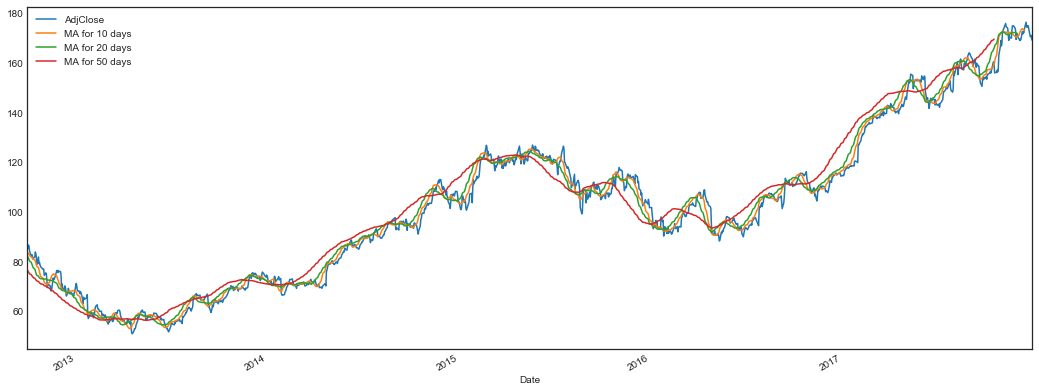

In [16]:
AAPL[['AdjClose','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(18,7))

In [83]:
pwd

'C:\\Users\\Ashish'

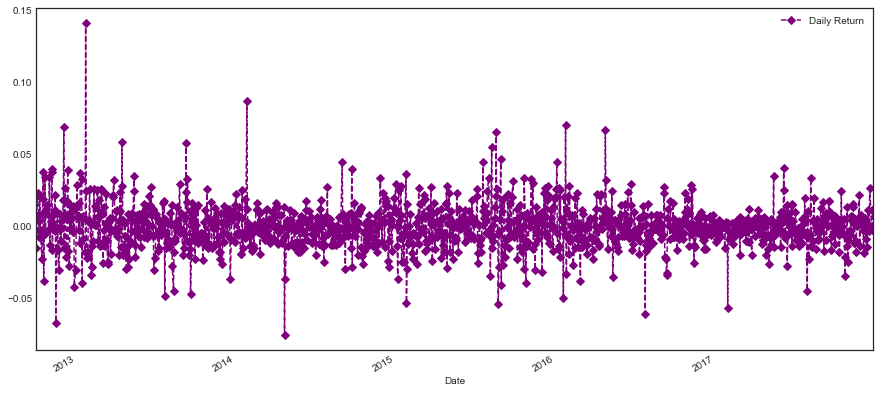

In [19]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()

AAPL['Daily Return'].plot(figsize=(15,7),legend=True,linestyle='--',marker='D',color = 'purple')

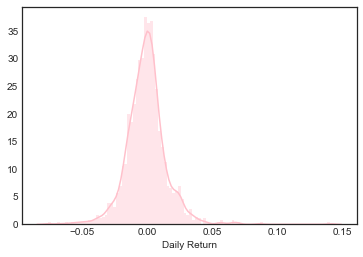

In [20]:
# One on other using displot (allows us to overlap the plots)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='pink')

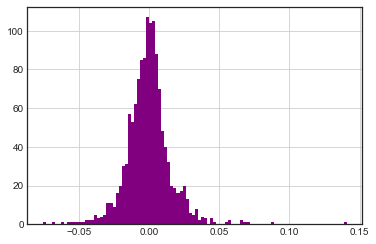

In [21]:
AAPL['Daily Return'].hist(bins = 100,color = 'purple')

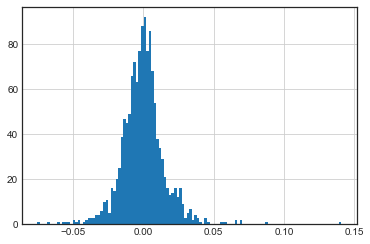

In [22]:
AAPL['Daily Return'].hist(bins = 120)

In [23]:
import pandas_datareader.data as web
import datetime

symbol  = ['AAPL','GOOGL','MSFT','AMZN']
start = datetime.datetime(2012, 10, 1)

end = datetime.datetime(2018, 1, 1)
for mSymbol in symbol:
    closing_df = web.DataReader(mSymbol,'quandl',start,end)['AdjClose']

# import pandas_datareader.data as web
#  symbol = 'WIKI/AAPL'  
#  df = web.DataReader(symbol, 'quandl', '2015-01-01', '2015-01-05')
#  df.loc['2015-01-02']

In [24]:
closing_df.head()

Date
2017-12-29    1169.47
2017-12-28    1186.10
2017-12-27    1182.26
2017-12-26    1176.76
2017-12-22    1168.36
Name: AdjClose, dtype: float64

In [25]:
# Refernce https://github.com/pandas-dev/pandas/issues/2277
# Here we are trying to make 4 different data sets and reset the index(date) as just other variables.#
# We are doing it to merge all these 4 data sets and create a new one for us#

GO = GOOGL.AdjClose
GO1 = GO.reset_index('Date')

AP = AAPL.AdjClose
AP1 = AP.reset_index('Date')

MS = MSFT.AdjClose
MS1 = MS.reset_index('Date')

AM = AMZN.AdjClose
AM1 = AM.reset_index('Date')

In [26]:
GO1.rename(columns = {'AdjClose':'GO_Close'}, inplace = True)
AP1.rename(columns = {'AdjClose':'AP_Close'}, inplace = True)
AM1.rename(columns = {'AdjClose':'AM_Close'}, inplace = True)
MS1.rename(columns = {'AdjClose':'MS_Close'}, inplace = True)

In [27]:
# Reference - https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.sort_values.html
GO2 = GO1.sort_values(by=['Date'])
AP2 = AP1.sort_values(by=['Date'])
MS2 = MS1.sort_values(by=['Date'])
AM2 = AM1.sort_values(by=['Date'])

In [28]:
# Reference https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

Data1 = GO2.merge(AP2, left_on='Date', right_on='Date', how='outer')
Data2 = MS2.merge(AM2, left_on='Date', right_on='Date', how='outer')
closing_df = Data1.merge(Data2, left_on='Date', right_on='Date', how='outer')

In [29]:
closing_df.head()

,Date,GO_Close,AP_Close,MS_Close,AM_Close
0,2012-10-01,382.069412,85.102578,25.615073,252.01
1,2012-10-02,379.666996,85.350378,25.762735,250.60
2,2012-10-03,382.430526,86.659073,25.936456,255.92
3,2012-10-04,385.214119,86.058932,26.084118,260.47
4,2012-10-05,385.013500,84.224952,25.927770,258.51


In [30]:
closing_df.sort_values(by=['Date'],ascending=False).tail()

,Date,GO_Close,AP_Close,MS_Close,AM_Close
4,2012-10-05,385.013500,84.224952,25.927770,258.51
3,2012-10-04,385.214119,86.058932,26.084118,260.47
2,2012-10-03,382.430526,86.659073,25.936456,255.92
1,2012-10-02,379.666996,85.350378,25.762735,250.60
0,2012-10-01,382.069412,85.102578,25.615073,252.01


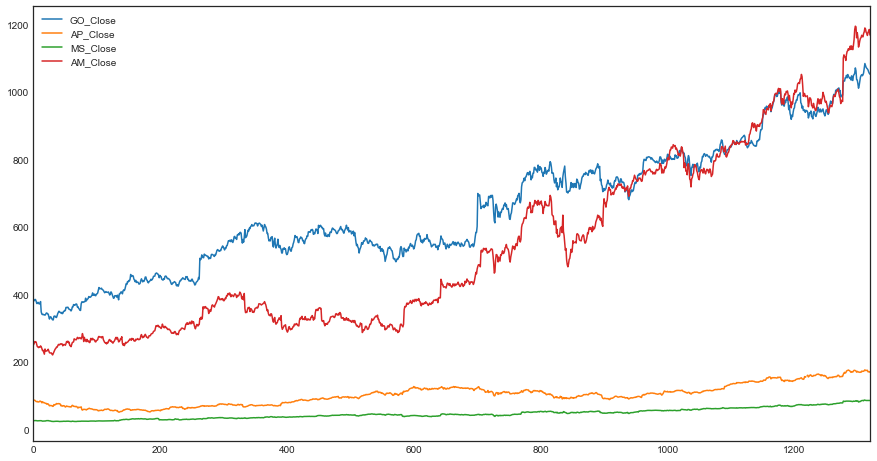

In [30]:
Data_F[['GO_Close','AP_Close','MS_Close','AM_Close']].plot(subplots=False,figsize=(15,8))

In [31]:
type(closing_df.GO_Close)

pandas.core.series.Series

In [32]:
closing_df['Pct_GO_Close'] = closing_df['GO_Close'].pct_change()*100
closing_df['Pct_AP_Close'] = closing_df['AP_Close'].pct_change()*100
closing_df['Pct_MS_Close'] = closing_df['MS_Close'].pct_change()*100
closing_df['Pct_AM_Close'] = closing_df['AM_Close'].pct_change()*100

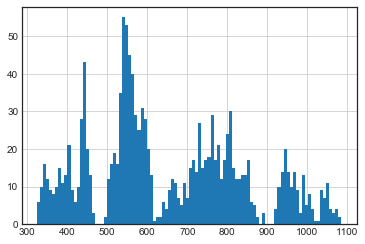

In [33]:
closing_df['GO_Close'].hist(bins = 100)

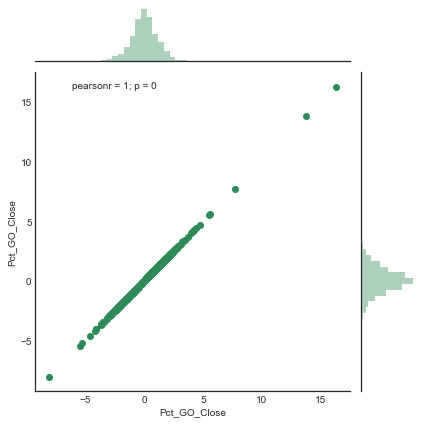

In [34]:
sns.jointplot('Pct_GO_Close','Pct_GO_Close',closing_df,kind= 'scatter',color ='seagreen',dropna=True)

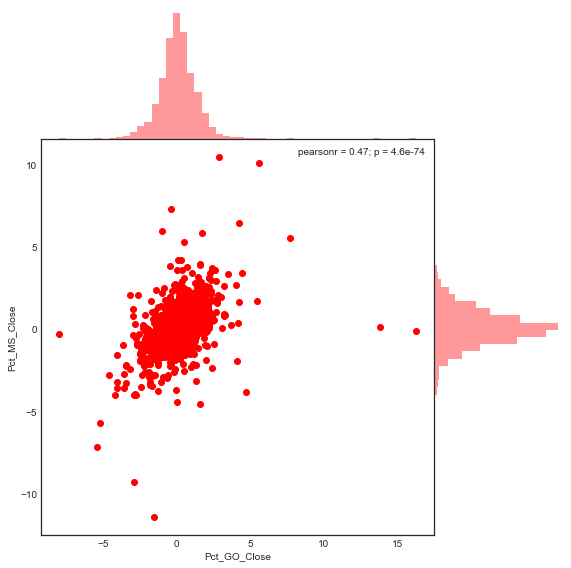

In [143]:
sns.jointplot('Pct_GO_Close','Pct_MS_Close',closing_df,kind= 'scatter', size=8, ratio=3, space=0, color='red',dropna=True)

In [35]:
#Since we want to draw pairplot for %change data only, I am creating a new dataset "tech_ret" which would have only pct data

tech_ret = closing_df.drop(['GO_Close','AP_Close','MS_Close','AM_Close'],axis=1)
tech_ret.head()

,Date,Pct_GO_Close,Pct_AP_Close,Pct_MS_Close,Pct_AM_Close
0,2012-10-01,NaN,NaN,NaN,NaN
1,2012-10-02,-0.628790,0.291178,0.576467,-0.559502
2,2012-10-03,0.727883,1.533320,0.674309,2.122905
3,2012-10-04,0.727869,-0.692531,0.569324,1.777899
4,2012-10-05,-0.052080,-2.131074,-0.599401,-0.752486


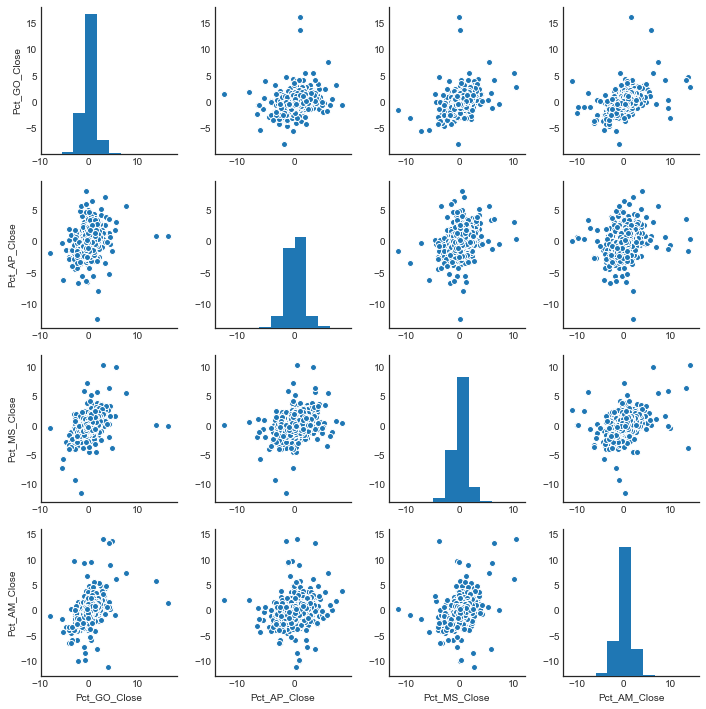

In [36]:
sns.pairplot(tech_ret.dropna())

C:\Users\Ashish\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


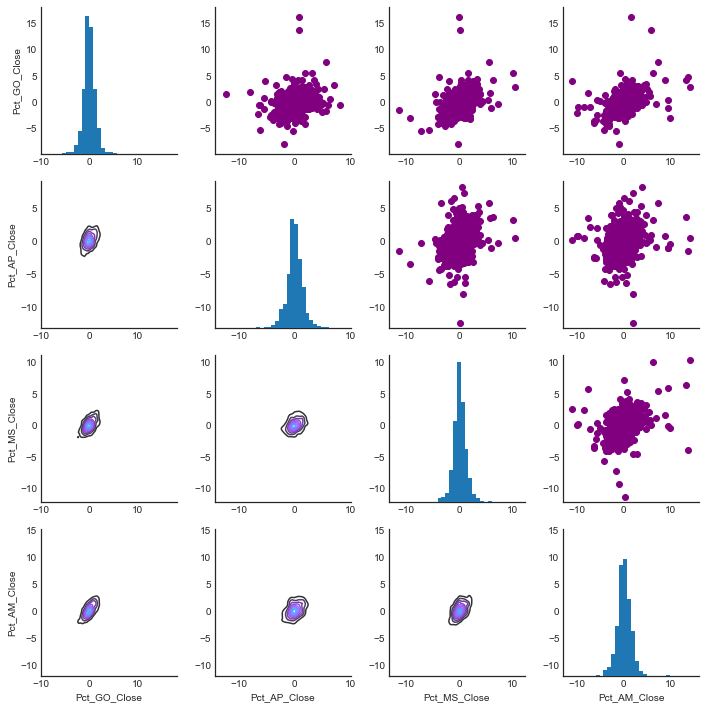

In [159]:
returns_fig = sns.PairGrid(tech_ret.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [38]:
corr = tech_ret.corr()

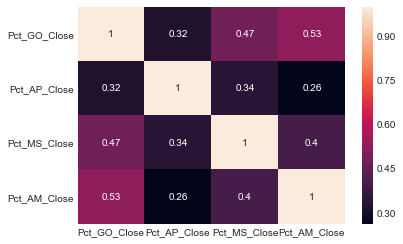

In [39]:
sns.heatmap(corr,annot=True)

In [45]:
rets = tech_ret.dropna()

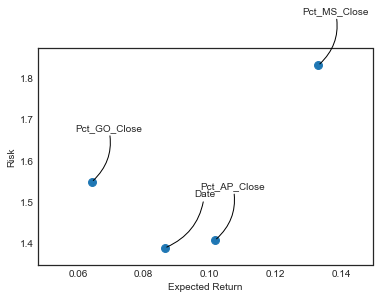

In [51]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))


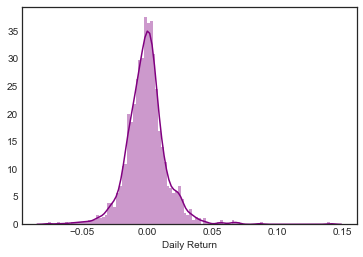

In [52]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'purple')

In [53]:
rets.head()

,Date,Pct_GO_Close,Pct_AP_Close,Pct_MS_Close,Pct_AM_Close
1,2012-10-02,-0.628790,0.291178,0.576467,-0.559502
2,2012-10-03,0.727883,1.533320,0.674309,2.122905
3,2012-10-04,0.727869,-0.692531,0.569324,1.777899
4,2012-10-05,-0.052080,-2.131074,-0.599401,-0.752486
5,2012-10-08,-1.277926,-2.209657,-0.234506,0.212758


In [55]:
rets['Pct_AP_Close'].quantile(0.05)

-2.426046692019457

In [ ]:
# Lecture 66